# Regularisation

# Load Data
see prior notebook for details

In [23]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [24]:
# save input and target variables
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [25]:
# normalize the target - this will make clearer training curves
targets = (targets - targets.mean(axis=0)) / targets.std()

In [26]:
# split into train and test
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [28]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dense(1)
    ])
    return model

model = get_regularised_model(1e-5, 0.3)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1408      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [30]:
# Fit the model
history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64, verbose=True)

Epoch 1/100
6/6 [==============================] - 1s 28ms/step - loss: 0.9755 - mae: 0.8389 - val_loss: 1.1268 - val_mae: 0.9316
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9653 - mae: 0.8316 - val_loss: 1.0837 - val_mae: 0.9101
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9308 - mae: 0.8117 - val_loss: 0.9468 - val_mae: 0.8457
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.8342 - mae: 0.7612 - val_loss: 0.7043 - val_mae: 0.7089
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6949 - mae: 0.6982 - val_loss: 0.4860 - val_mae: 0.5514
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6202 - mae: 0.6423 - val_loss: 0.4353 - val_mae: 0.5100
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5923 - mae: 0.6242 - val_loss: 0.4195 - val_mae: 0.5224
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5838 - mae: 0.62

6/6 [==============================] - 0s 11ms/step - loss: 0.4178 - mae: 0.5000 - val_loss: 0.4527 - val_mae: 0.5641
Epoch 64/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4276 - mae: 0.5234 - val_loss: 0.4185 - val_mae: 0.5464
Epoch 65/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3974 - mae: 0.4895 - val_loss: 0.4295 - val_mae: 0.5377
Epoch 66/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4413 - mae: 0.5288 - val_loss: 0.4360 - val_mae: 0.5563
Epoch 67/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4217 - mae: 0.5154 - val_loss: 0.4215 - val_mae: 0.5478
Epoch 68/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4298 - mae: 0.5144 - val_loss: 0.4180 - val_mae: 0.5400
Epoch 69/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4067 - mae: 0.5089 - val_loss: 0.4316 - val_mae: 0.5489
Epoch 70/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4097 - mae: 0.5106 - 

In [31]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets,verbose=2)

2/2 - 0s - loss: 0.6327 - mae: 0.6110 - 17ms/epoch - 8ms/step


[0.6326959133148193, 0.6110324263572693]

### Plot the learning curves

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

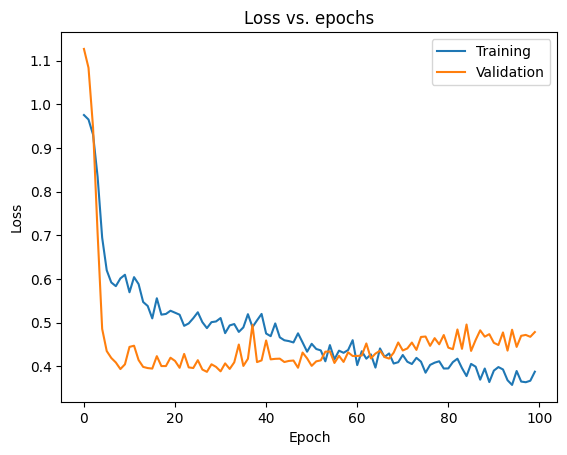

In [33]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()